In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iowatrain = pd.read_csv('./datasets/train.csv')

In [3]:
iowatrain.head();

In [4]:
iowatrain.isnull().sum();

In [5]:
iowatrain.describe().T;

In [6]:
iowatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [7]:
iowatrain.drop('Id', axis = 1, inplace=True) #Don't need this. 

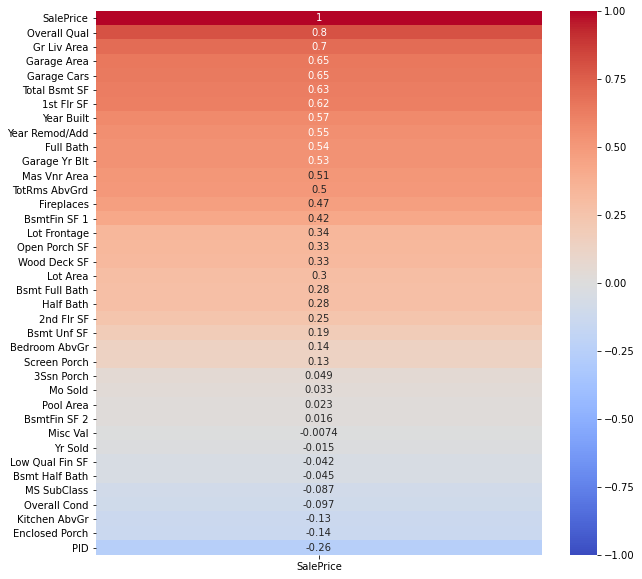

In [8]:
fig, ax = plt.subplots(figsize=(10,10))  # Sample figsize in inches

sns.heatmap(iowatrain.corr()[['SalePrice']].sort_values(
                                                        by='SalePrice', 
                                                        ascending=False),
            annot=True, vmin=-1, vmax=1,
           cmap='coolwarm', ax=ax);

# https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
# This is a link that showed me how to get my heatmap bigger!

# Important to note that the heat map only shows corrrelations 
# with numerical columns. 

# I"MA HAVE TO GET DUMB!! I also need to make sure to remove outliners from ones I want

In [9]:
iowatrain["Bsmt Cond"].fillna('NA', inplace=True)
iowatrain['Bsmt Qual'].fillna('NA', inplace=True)
iowatrain['Bsmt Exposure'].fillna('NA', inplace=True)
iowatrain['BsmtFin Type 1'].fillna('NA', inplace=True)
iowatrain['BsmtFin Type 2'].fillna('NA', inplace=True)

iowatrain['Fireplace Qu'].fillna('NA', inplace=True)
iowatrain['Garage Finish'].fillna('NA', inplace=True)
iowatrain['Garage Qual'].fillna('NA', inplace=True)
iowatrain['Garage Cond'].fillna('NA', inplace=True)
iowatrain['Pool QC'].fillna('NA', inplace=True)
iowatrain['Fence'].fillna('NA', inplace=True)

In [10]:
# This is a reeeeeeeeeeeeallllly big data set. Let's rethink this.
# How about we take all the ordinal variables and make them ranked! 
ordinalcols = [ 'Lot Shape', 'Utilities' , 'Land Slope', 'Exter Qual',
               'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 
               'BsmtFin Type 1', 'BsmtFin Type 2' , 'Heating QC',
               'Electrical', 'Kitchen Qual' , "Functional", 
               'Fireplace Qu', 'Garage Finish','Garage Qual', 
               'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence' ]
# ordinal_df = iowatrain[ordinalcols]

# ordinal_df.columns = [x.lower() for x in ordinal_df.columns]
# ordinal_df.columns = [x.strip().replace(' ', '_') for x in ordinal_df.columns]
iowatrain.columns = [x.lower() for x in iowatrain.columns]
iowatrain.columns = [x.strip().replace(' ', '_') for x in iowatrain.columns]
ordinalcols = [x.lower() for x in ordinalcols]
ordinalcols = [x.strip().replace(' ', '_') for x in ordinalcols]

In [11]:
# # I'm organizing these from good to bad, as best as I know. I'm not a realitor but hey -_O_-
# replist01 = ['Reg', 'IR1', 'IR2', 'IR3'] #LotShape
# replist02 = ['AllPub', 'NoSeWa', 'NoSewr'] #Utilities
# replist03 = ['Gtl',  'Mod', 'Sev'] #LandSlope
# replist04 = ['NA', 'Ex','Gd', 'TA', 'Fa', 'Po'] #ExtQual, ExtrCond, BsmtQual, BsmtCond,,HeatingQC, KitchenQual:
#                                                #FireplaceQu, GarageQual, GarageCond, PoolQC,  
# replist05 = ['Gd', 'Av', 'Mn', 'No', 'NA'] #Bsmt Exposure
# replist06 = ['NA', 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'] #BsmtFinType1&2, 
# replist07 = ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'] #Electrical
# replist08 = ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'] #Functional(Home), 
# replist09 = ['NA', 'Fin', 'RFn', 'Unf'] # GarageFinish, 
# replist10 = ['Y', 'P', 'N'] #Paved Drive
# replist11 = ['NA', 'GdPrv', 'MnPrv', 'GdWo', 'MnWw'] #Fence

In [12]:
iowatrain.replace({
            'lot_shape': {'Reg':4 , 'IR1':3 , 'IR2':2 , 'IR3':1 },
            'utilities': {'AllPub':3, 'NoSeWa':2, 'NoSewr':1 },
            'land_slope': {'Gtl':3,  'Mod':2, 'Sev':1},
            'exter_qual': {'NA':0, 'Ex':5,'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            'exter_cond': {'NA':0, 'Ex':5,'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            'bsmt_qual':  {'NA':0, 'Ex':5,'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            'bsmt_cond':  {'NA':0, 'Ex':5,'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            'bsmt_exposure': {'NA': 0, 'Gd':4 , 'Av':3, 'Mn':2, 'No':1},
            'bsmtfin_type_1': {'NA':0, 'GLQ':6, 'ALQ':5, 'BLQ':4,
                                      'Rec':3, 'LwQ':2, 'Unf':1},
            'bsmtfin_type_2': {'NA':0, 'GLQ':6, 'ALQ':5, 'BLQ':4,
                                      'Rec':3, 'LwQ':2, 'Unf':1},
            'heating_qc': {'NA':0, 'Ex':5,'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            'electrical': {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1},
            'kitchen_qual':  {'NA':0, 'Ex':5,'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            'functional':{'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 
                                   'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1 },
            'fireplace_qu': {'NA':0, 'Ex':5,'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            'garage_finish': {'NA':0, 'Fin':3, 'RFn':2, 'Unf':1},
            'garage_qual':   {'NA':0, 'Ex':5,'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            'garage_cond':    {'NA':0, 'Ex':5,'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            'paved_drive':   {'Y':3, 'P':2, 'N':1},
            'pool_qc':   {'NA':0, 'Ex':5,'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            'fence':  {'NA':0, 'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1}
            }, inplace=True)
#Okay The ordinal Values are now fixed and numbered!!!

In [13]:
iowatrain['alley'].fillna('NA', inplace=True)
iowatrain['mas_vnr_type'].fillna('NA', inplace=True)
iowatrain['garage_type'].fillna('NA', inplace=True)
iowatrain['misc_feature'].fillna('NA', inplace=True)

# HERE THERE IS ONLY ONE NULL VALUE FOR THESE, SO I'M USING THE MEAN SO NOT TO SQEW
# THE DATA.
iowatrain['garage_yr_blt'].fillna(iowatrain['garage_yr_blt'].mean(), inplace=True)
iowatrain['bsmtfin_sf_1'].fillna(iowatrain['bsmtfin_sf_1'].mean(), inplace=True)
iowatrain['bsmtfin_sf_2'].fillna(iowatrain['bsmtfin_sf_2'].mean(), inplace=True)
iowatrain['mas_vnr_area'].fillna(iowatrain['mas_vnr_area'].mean(), inplace=True)
iowatrain['bsmt_unf_sf'].fillna(iowatrain['bsmt_unf_sf'].mean(), inplace=True)
iowatrain['total_bsmt_sf'].fillna(iowatrain['total_bsmt_sf'].mean(), inplace=True)
iowatrain['bsmt_full_bath'].fillna(iowatrain['bsmt_full_bath'].mean(), inplace=True)
iowatrain['bsmt_half_bath'].fillna(iowatrain['bsmt_half_bath'].mean(), inplace=True)
iowatrain['garage_cars'].fillna(iowatrain['garage_cars'].mean(), inplace=True)
iowatrain['garage_area'].fillna(iowatrain['garage_area'].mean(), inplace=True)
# I don't know why there are no 0 values for lot_frontage, so I'm going to 
# assume that they have no lottage by a street. 
iowatrain['lot_frontage'].fillna(0, inplace= True)

In [14]:
numericalcols = [col for col in iowatrain.columns if iowatrain[col].dtype != 'O']
#These are all the columsn that have numerical values. Now includind the
# Ordinal and Continuous and Discrete numerically.

In [15]:
iowatrain[numericalcols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              2051 non-null   int64  
 1   ms_subclass      2051 non-null   int64  
 2   lot_frontage     2051 non-null   float64
 3   lot_area         2051 non-null   int64  
 4   lot_shape        2051 non-null   int64  
 5   utilities        2051 non-null   int64  
 6   land_slope       2051 non-null   int64  
 7   overall_qual     2051 non-null   int64  
 8   overall_cond     2051 non-null   int64  
 9   year_built       2051 non-null   int64  
 10  year_remod/add   2051 non-null   int64  
 11  mas_vnr_area     2051 non-null   float64
 12  exter_qual       2051 non-null   int64  
 13  exter_cond       2051 non-null   int64  
 14  bsmt_qual        2051 non-null   int64  
 15  bsmt_cond        2051 non-null   int64  
 16  bsmt_exposure    2051 non-null   int64  
 17  bsmtfin_type_1

In [16]:
iowatrain.columns;

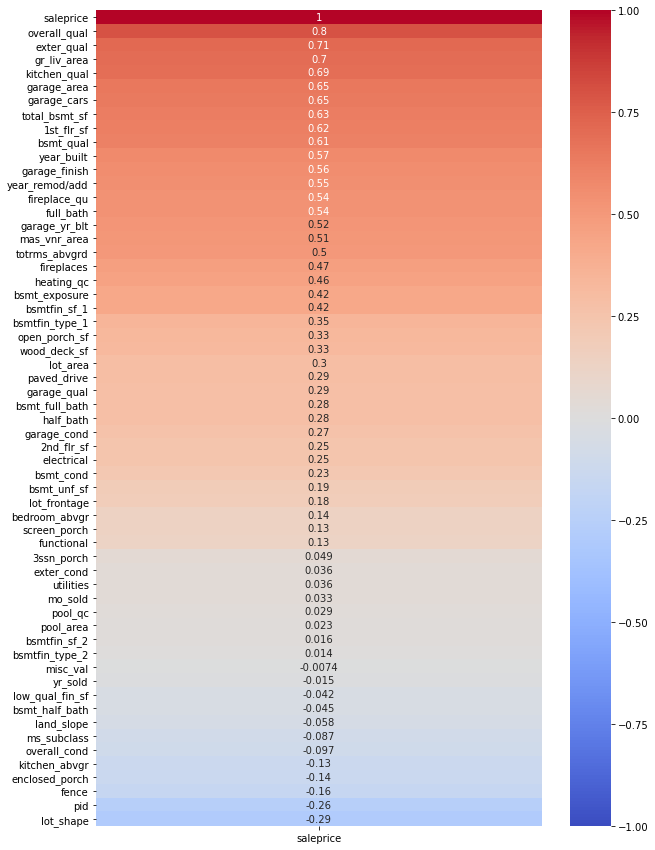

In [17]:
fig, ax = plt.subplots(figsize=(10,15))

sns.heatmap(iowatrain.corr()[['saleprice']].sort_values(by='saleprice', ascending=False),
            annot=True, vmin=-1, vmax=1,
           cmap='coolwarm', ax=ax);

In [18]:
iowatrain['ms_subclass'] = iowatrain['ms_subclass'].astype(str)

In [48]:
# # Now I should go through and change the Nominal Values to be Dummy and   
# # make sure the Nominal values are not numerical unless dummied. 
# nominal = [ 'ms_subclass', 'ms_zoning', 'street', 'alley', 'land_contour', 'lot_config', 
#            'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style',
#            'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
#            'foundation', 'heating', 'central_air', 'garage_type', 'misc_feature', 'sale_type' ]


In [49]:
# iowatrain_dummy = pd.get_dummies(iowatrain[nominal], drop_first=True)

In [50]:
# for col in iowatrain_dummy.columns:
#     if iowatrain_dummy[col].isnull().sum() >0:
#         print(col) 
# # no nulls. 
# iowatrain_dummy.head()

In [51]:
# numerical_iowa = iowatrain.drop(nominal, axis = 1) # Getting only the numerical values!                                           

In [52]:
# Here I am poly fit transforming, to see if some of these have dependencies on each other. 
# poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False )
# numiowa_train_overfit = poly.fit_transform(numerical_iowatrain)
# polyfit_num_train = pd.DataFrame(numiowa_train_overfit)
# polyfit_num_train.shape

In [53]:
# iowatrain_clean = pd.concat([numerical_iowa , iowatrain_dummy], axis=1)

In [54]:
# iowatrain_clean.to_csv('./datasets/iowatrain_clean3.csv')

OK LETS RE-EVALUATE. WE ONLY NEED SOME DUMMIES. BUT WITCH ONES??

In [55]:
# for col in iowatrain_clean.columns:
#     if iowatrain_clean[col].isnull().sum() >0:
#         print(col) 

In [56]:
# plt.scatter(x = iowatrain_clean['gr_liv_area'], y= iowatrain_clean['saleprice'])
#got to go and drop the outliners! gUNNA SORT OUT THE NUMERICALS AFTER i CLEAN THE DUMMYS. 

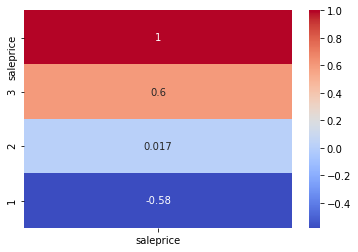

In [34]:
dumheat = pd.get_dummies(iowatrain['neighborhood']) #BUCKET THE HOOD
dumheat['saleprice'] = iowatrain['saleprice']

sns.heatmap(dumheat.corr()[['saleprice']].sort_values(by='saleprice', ascending=False),
           annot = True, cmap='coolwarm')

# sns.heatmap(iowatrain.corr()[['saleprice']].sort_values(by='saleprice', ascending=False),
#             annot=True, vmin=-1, vmax=1,
#            cmap='coolwarm', ax=ax);

In [28]:
dumheat.corr()[['saleprice']].sort_values(by='saleprice', ascending=False);
#NEIGHBORHOOD

In [21]:
nicehood = ('NridgHt','NoRidge','StoneBr','Somerst',
    'Timber','Veenker','CollgCr','Crawfor','ClearCr')
okhood = ('Crawfor','ClearCr','GrnHill','NWAmes',
          'Blmngtn','Gilbert','SawyerW','Greens',
          'Landmrk','Blueste','Mitchel','NPkVill')	
badhood = ('SWISU','BrDale','MeadowV','Sawyer','BrkSide',
           'Edwards','IDOTRR','NAmes','OldTown')

In [22]:
nicehood_cor =[]
okhood_cor = []
badhood_cor = []
for col in dumheat.columns:
    if col != 'saleprice':
        if dumheat[col].corr(dumheat['saleprice']) > 0.05:
            nicehood_cor.append(dumheat[col].corr(dumheat['saleprice']))
        elif dumheat[col].corr(dumheat['saleprice']) < -0.05:
            badhood_cor.append(dumheat[col].corr(dumheat['saleprice']))
        else:
            okhood_cor.append(dumheat[col].corr(dumheat['saleprice']))

print(
    np.mean(nicehood_cor),
    np.mean(okhood_cor),
    np.mean(badhood_cor))


0.16798675372099847 0.0022341839293463775 -0.14585244112872248


In [25]:
[iowatrain['neighborhood'].replace(to_replace=col, value = 3, inplace=True) 
 for col in iowatrain['neighborhood'] if col in nicehood]

[iowatrain['neighborhood'].replace(to_replace=col, value = 2, inplace=True) 
 for col in iowatrain['neighborhood'] if col in okhood]

[iowatrain['neighborhood'].replace(to_replace=col, value = 1, inplace=True) 
 for col in iowatrain['neighborhood'] if col in badhood]
iowatrain['neighborhood']

### I just made this a bucketed list (more organized than dummies)

0       1
1       2
2       1
3       3
4       2
       ..
2046    3
2047    1
2048    3
2049    1
2050    2
Name: neighborhood, Length: 2051, dtype: int64

In [26]:
# # Now I should go through and change the Nominal Values to be Dummy and   
# # make sure the Nominal values are not numerical unless dummied. 
# nominal = [ 'ms_subclass', 'ms_zoning', 'street', 'alley', 'land_contour', 'lot_config', 
#            'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style',
#            'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
#            'foundation', 'heating', 'central_air', 'garage_type', 'misc_feature', 'sale_type' ]


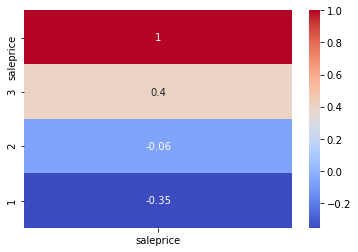

In [35]:
dumheat = pd.get_dummies(iowatrain['exterior_1st']) #BUcket the Exterior_1
dumheat['saleprice'] = iowatrain['saleprice']

sns.heatmap(dumheat.corr()[['saleprice']].sort_values(by='saleprice', ascending=False),
           annot = True, cmap='coolwarm');

# sns.heatmap(iowatrain.corr()[['saleprice']].sort_values(by='saleprice', ascending=False),
#             annot=True, vmin=-1, vmax=1,
#            cmap='coolwarm', ax=ax);

In [36]:
dumheat.corr()[['saleprice']].sort_values(by='saleprice', ascending=False);
#SALE_TYPE

In [37]:
good_ext = ('VinylSd','CemntBd')
ok_etr = ('Stone', 'BrkFace','ImStucc','BrkComm',
          'AsphShn','CBlock','Plywood','WdShing','Stucco')
bad_ext = ('HdBoard', 'AsbShng', 'MetalSd','Wd Sdng')


In [38]:
[iowatrain['exterior_1st'].replace(to_replace=col, value = 3, inplace=True) 
 for col in iowatrain['exterior_1st'] if col in good_ext]

[iowatrain['exterior_1st'].replace(to_replace=col, value = 2, inplace=True) 
 for col in iowatrain['exterior_1st'] if col in ok_etr]

[iowatrain['exterior_1st'].replace(to_replace=col, value = 1, inplace=True) 
 for col in iowatrain['exterior_1st'] if col in bad_ext]
# WE JUST MADE ANOTHER BUCKET! 
iowatrain['exterior_1st'];

In [39]:
dumheat = pd.get_dummies(iowatrain['sale_type']) # Bucket the sale Type
dumheat['saleprice'] = iowatrain['saleprice']

dumheat.corr()[['saleprice']].sort_values(by='saleprice', ascending=False);

In [40]:
iowatrain['sale_type'].value_counts();

In [41]:
garagemap = iowatrain['sale_type'].map( 
    {'WD ' : 1, 'New':3,'COD':1,'NA':2,'ConLD':2,'CWD':2, 'ConLI':2,'ConLw':2,'Oth':2,'Con' :2 })


In [42]:
garagemap.value_counts()

1    1844
3     160
2      47
Name: sale_type, dtype: int64

In [43]:
iowatrain['sale_type']= garagemap
iowatrain['sale_type']

0       3
1       3
2       3
3       3
4       3
       ..
2046    3
2047    3
2048    3
2049    3
2050    3
Name: sale_type, Length: 2051, dtype: int64

In [44]:
#Items to dummify because they actually kinda matter! 
pleasedummifyme = ('central_air', 'house_style', 'roof_style', 'mas_vnr_type',
                   'foundation', 'heating')

In [45]:
dummified_dflist = [pd.get_dummies(iowatrain[i]) for i in iowatrain.columns 
                    if i in pleasedummifyme ]
dummified_dflist = pd.concat(dummified_dflist,axis = 1)


In [46]:
# Okay cool , so we have the dummified columns and we have fixed all the ordinal as well as make 3 buckets. 

# We still need to check the numerical columns and select the largest influencers, 
# then we must check for outliars. 

#Then we will make a DF with all the columns we care about. 

In [48]:
iowatrain.corr()[['saleprice']].sort_values(by='saleprice', ascending=False).head(15)

,saleprice
saleprice,1.000000
overall_qual,0.800207
exter_qual,0.712146
gr_liv_area,0.697038
kitchen_qual,0.692336
garage_area,0.650246
garage_cars,0.648197
total_bsmt_sf,0.628668
1st_flr_sf,0.618486
bsmt_qual,0.612188


In [ ]:
['overall_qual', 'exter_qual'] #Discrete


['overall_qual','gr_liv_area','garage_area','total_bsmt_sf',
'1st_flr_sf','year_remod/add','full_bath','totrms_abvgrd',	
'fireplaces','heating_qc','bsmt_qual','kitchen_qual','exter_qual'] # numericals

['central_air', 'house_style', 'roof_style', 'mas_vnr_type','foundation'] #dummies
['sale_type', 'exterior_1st', 'neighborhood'] buckets

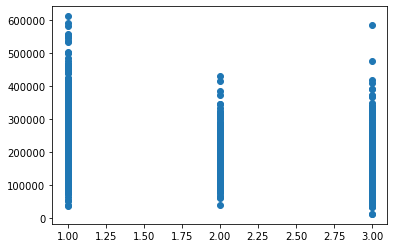

In [50]:
plt.scatter(x=iowatrain['exterior_1st'], y=iowatrain['saleprice'])

In [ ]:
# remove outliners over 5000! gr_liv_area, total_bsmt_sf
# remove outliners over 4000! 1st_flr_sf

In [76]:
# HAHAHHAHA YES FINALLLY WE CAN GO ON! #############################################################
####################################################################################################

In [78]:
# features = 
# Here I am removing items I don't want to include in my test

X = iowatrain_clean.drop(['saleprice', 
                          'lot_frontage' , 'mas_vnr_area' , 
                          'garage_yr_blt', 'pid'], axis = 1)

y = iowatrain_clean['saleprice']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Columns: 208 entries, lot_area to sale_type_WD 
dtypes: float64(8), int64(45), uint8(155)
memory usage: 1.1 MB


In [79]:
lr = LinearRegression()
sc = StandardScaler()
# poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False )
# X_overfit = poly.fit_transform(X)

In [80]:
# X_overfit.shape

In [81]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y, 
                                                    train_size=0.8,
                                                    random_state=42)

In [82]:
Z_train = sc.fit_transform(X_train)
Z_test = sc.fit_transform(X_test)

In [83]:
# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(Z_train, y_train)

# Evaluate model using R2.
print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))

0.9249610696041054
0.880476845611328


In [84]:
print(Z_train.shape)
print(Z_test.shape)

(1640, 208)
(411, 208)


In [85]:
# lr.fit(Z_train, y_train)
# lr.score(Z_test, y_test)
# lr.score(Z_train, y_train)

In [86]:
#################################################################################################################################

In [87]:
iowatest = pd.read_csv('./datasets/test.csv')

In [88]:
iowatest.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    160
               ... 
Misc Feature    837
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Length: 80, dtype: int64

In [89]:
iowatest["Bsmt Cond"].fillna('NA', inplace=True)
iowatest['Bsmt Qual'].fillna('NA', inplace=True)
iowatest['Bsmt Exposure'].fillna('NA', inplace=True)
iowatest['BsmtFin Type 1'].fillna('NA', inplace=True)
iowatest['BsmtFin Type 2'].fillna('NA', inplace=True)
iowatest['Electrical'].fillna(0, inplace=True)
iowatest['Fireplace Qu'].fillna('NA', inplace=True)
iowatest['Garage Finish'].fillna('NA', inplace=True)
iowatest['Garage Qual'].fillna('NA', inplace=True)
iowatest['Garage Cond'].fillna('NA', inplace=True)
iowatest['Pool QC'].fillna('NA', inplace=True)
iowatest['Fence'].fillna('NA', inplace=True)

In [90]:
iowatest.columns = [x.lower() for x in iowatest.columns]
iowatest.columns = [x.strip().replace(' ', '_') for x in iowatest.columns]

In [91]:
iowatest['ms_subclass'] = iowatest['ms_subclass'].astype(str)

In [92]:
iowatest.replace({
            'lot_shape': {'Reg':1 , 'IR1':2 , 'IR2':3 , 'IR3':4 },
            'utilities': {'AllPub':1, 'NoSeWa':2, 'NoSewr':3 },
            'land_slope': {'Gtl':1,  'Mod':2, 'Sev':3},
            'exter_qual': {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'exter_cond': {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'bsmt_qual':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'bsmt_cond':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'bsmt_exposure': {'NA': 0, 'Gd':1 , 'Av':2, 'Mn':3, 'No':4},
            'bsmtfin_type_1': {'NA':0, 'GLQ':1, 'ALQ':2, 'BLQ':3,
                                      'Rec':4, 'LwQ':5, 'Unf':6},
            'bsmtfin_type_2': {'NA':0, 'GLQ':1, 'ALQ':2, 'BLQ':3,
                                      'Rec':4, 'LwQ':5, 'Unf':6},
            'heating_qc': {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'electrical': {'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix':5},
            'kitchen_qual':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'functional':{'Typ':1, 'Min1':2, 'Min2':3, 'Mod':4, 
                                   'Maj1':5, 'Maj2':6, 'Sev':7, 'Sal':8 },
            'fireplace_qu':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'garage_finish': {'NA':0, 'Fin':1, 'RFn':2, 'Unf':3},
            'garage_qual':   {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'garage_cond':    {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'paved_drive':   {'Y':1, 'P':2, 'N':3},
            'pool_qc':   {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'fence':  {'NA':0, 'GdPrv':1, 'MnPrv':2, 'GdWo':3, 'MnWw':4}
            }, inplace=True)

In [93]:
numerical_iowa_TEST = iowatest.drop(nominal, axis = 1) # Getting only the numerical values! 

# numerical_iowaTEST = numerical_iowa_1.drop([ 'lot_frontage' , 'mas_vnr_area' , 
#                                              'garage_yr_blt', 'pid'], axis = 1)
# # Here I am removing items I don't want to include in my test and polytransform.
                                          

# # Here I am poly fit transforming, to see if some of these have dependencies on each other. 
# poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False )

# numiowa_TEST_overfit = poly.fit_transform(numerical_iowaTEST)
# polyfit_num_TEST = pd.DataFrame(numiowa_TEST_overfit)
# polyfit_num_TEST.shape

In [94]:
iowatest_dummy = pd.get_dummies(iowatest[nominal], drop_first=True)

In [101]:
for col in iowatest_dummy.columns:
    if iowatest_dummy[col].isnull().sum() >0:
        print(col) 
# no nulls. 
iowatest_dummy.shape

(878, 140)

In [96]:
iowatest_clean = pd.concat([numerical_iowa_TEST , iowatest_dummy], axis=1)



In [97]:
for col in polyfit_num_TEST.columns:
    if polyfit_num_TEST[col].isnull().sum() >0:
        print(col)

In [98]:
XX = iowatest_clean.drop(['lot_frontage' , 'mas_vnr_area' , 'garage_yr_blt', 'pid'], axis = 1)


# iowatest[numericalcols2].info()
# We have extra null values in a few columns ( lot_frontage , mas_vnr_area , garage_yr_blt )
# We will have to remove these values from the test before we fit it I think. 
# Might as well take 'pid' out too.

# XX_overfit = poly.fit_transform(XX)

In [99]:
# XX = iowatest[numericalcols2]
# XX.isnull().sum()
XX_test = sc.fit_transform(XX)
# ridge_model.predict()
XX_test.shape

(878, 194)

In [100]:
ridge_model.predict(XX_test);

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 208 is different from 194)

In [ ]:
iowatest['saleprice'] = ridge_model.predict(XX_test)

In [ ]:
submission = iowatest[['id', 'saleprice']].copy()

In [ ]:
submission

In [ ]:
submission.to_csv('./datasets/submission_04.csv', index=False)

In [ ]:


#  HAVE TO MATCH THE COLUMNS OF MY DUMMY SET, BECAUSE I HAVE MORE OR LESS COLUMNS IN MY TRAIN SET THAN TEST SET. 